In [1]:
import pandas as pd
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv

# Read the text file containing data using pandas
dataset = pd.read_csv('doggy-boot-harness.csv')

# Print the data
# Because there are a lot of data, use head() to only print the first few rows
dataset.head()

--2023-12-25 03:29:37--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py’

graphing.py         100%[===================>]  21.01K  --.-KB/s    in 0.001s  

2023-12-25 03:29:38 (14.8 MB/s) - ‘graphing.py’ saved [21511/21511]

--2023-12-25 03:29:38--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sen

,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


In [2]:
# Look at the harness sizes
print("Harness sizes")
print(dataset.harness_size)

# Remove the sex and age-in-years columns.
del dataset["sex"]
del dataset["age_years"]

# Print the column names
print("\nAvailable columns after deleting sex and age information:")
print(dataset.columns.values)

Harness sizes
0     58
1     58
2     52
3     58
4     57
5     52
6     55
7     53
8     49
9     54
10    59
11    56
12    53
13    58
14    57
15    58
16    56
17    51
18    50
19    59
20    59
21    59
22    55
23    50
24    55
25    52
26    53
27    54
28    61
29    56
30    55
31    60
32    57
33    56
34    61
35    58
36    53
37    57
38    57
39    55
40    60
41    51
42    52
43    56
44    55
45    57
46    58
47    57
48    51
49    59
Name: harness_size, dtype: int64

Available columns after deleting sex and age information:
['boot_size' 'harness_size']


In [3]:
# Print the data at the top of the table
print("TOP OF TABLE")
print(dataset.head())

# print the data at the bottom of the table
print("\nBOTTOM OF TABLE")
print(dataset.tail())

TOP OF TABLE
   boot_size  harness_size
0         39            58
1         38            58
2         37            52
3         39            58
4         38            57

BOTTOM OF TABLE
    boot_size  harness_size
45         41            57
46         39            58
47         39            57
48         35            51
49         39            59


In [4]:
# Print how many rows of data we have
print(f"We have {len(dataset)} rows of data")

# Determine whether each avalanche dog's harness size is < 55
# This creates a True or False value for each row where True means
# they are smaller than 55
is_small = dataset.harness_size < 55
print("\nWhether the dog's harness was smaller than size 55:")
print(is_small)

# Now apply this 'mask' to our data to keep the smaller dogs
data_from_small_dogs = dataset[is_small]
print("\nData for dogs with harness smaller than size 55:")
print(data_from_small_dogs)

# Print the number of small dogs
print(f"\nNumber of dogs with harness size less than 55: {len(data_from_small_dogs)}")

We have 50 rows of data

Whether the dog's harness was smaller than size 55:
0     False
1     False
2      True
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24    False
25     True
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
Name: harness_size, dtype: bool

Data for dogs with harness smaller than size 55:
    boot_size  harness_size
2          37            52
5          35            52
7          36            53
8          35            49
9          40            54
12         38            53
17         36            51
18         35    

In [5]:
data_smaller_paws = dataset[dataset.boot_size < 40].copy()


# Print information about this
print(f"We now have {len(data_smaller_paws)} rows in our dataset. The last few rows are:")
data_smaller_paws.tail()

We now have 34 rows in our dataset. The last few rows are:


,boot_size,harness_size
42,36,52
46,39,58
47,39,57
48,35,51
49,39,59


Text(0, 0.5, 'boot_size')

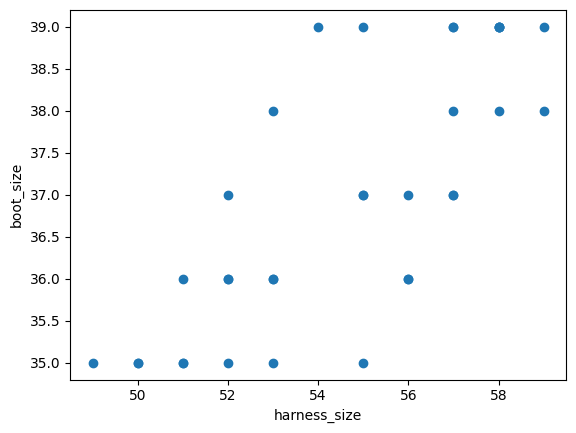

In [6]:
# Load and prepare matplotlib to use for plotting graphs
import matplotlib.pyplot as plt


# Show a graph of harness size by boot size:
plt.scatter(data_smaller_paws["harness_size"], data_smaller_paws["boot_size"])

# add labels
plt.xlabel("harness_size")
plt.ylabel("boot_size")

In [7]:
import statsmodels.formula.api as smf

model = smf.ols(formula = "boot_size ~ harness_size", data = dataset).fit()

print("Model trained!")

Model trained!


In [9]:
import joblib
model_filename = 'dogHarness_project_model.pkl'

# Save the model using joblib
joblib.dump(model, model_filename)

print("Model saved!")


Model saved!


In [10]:
model_loaded = joblib.load(model_filename)

print("We have loaded a model with the following parameters:")
print(model_loaded.params)

We have loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


In [11]:
# Let's write a function that loads and uses our model
def load_model_and_predict(harness_size):


    # Load the model from file and print basic information about it
    loaded_model = joblib.load(model_filename)

    print("We've loaded a model with the following parameters:")
    print(loaded_model.params)

    # Prepare data for the model
    inputs = {"harness_size":[harness_size]}

    # Use the model to make a prediction
    predicted_boot_size = loaded_model.predict(inputs)[0]

    return predicted_boot_size

# Practice using our model
predicted_boot_size = load_model_and_predict(45)

print("Predicted dog boot size:", predicted_boot_size)

We've loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64
Predicted dog boot size: 32.08575356590479


In [12]:
def check_size_of_boots(selected_harness_size, selected_boot_size):
    '''
    Calculates whether the customer has chosen a pair of doggy boots that
    are a sensible size. This works by estimating the dog's actual boot
    size from their harness size.

    This returns a message for the customer that should be shown before
    they complete their payment

    selected_harness_size: The size of the harness the customer wants to buy
    selected_boot_size: The size of the doggy boots the customer wants to buy
    '''

    # Estimate the customer's dog's boot size
    estimated_boot_size = load_model_and_predict(selected_harness_size)

    # Round to the nearest whole number because we don't sell partial sizes
    estimated_boot_size = int(round(estimated_boot_size))

    # Check if the boot size selected is appropriate
    if selected_boot_size == estimated_boot_size:
        # The selected boots are probably OK
        return f"Great choice! We think these boots will fit your avalanche dog well."

    if selected_boot_size < estimated_boot_size:
        # Selected boots might be too small
        return "The boots you have selected might be TOO SMALL for a dog as "\
               f"big as yours. We recommend a doggy boots size of {estimated_boot_size}."

    if selected_boot_size > estimated_boot_size:
      # Selected boots might be too big
        return "The boots you have selected might be TOO BIG for a dog as "\
               f"small as yours. We recommend a doggy boots size of {estimated_boot_size}."


# Practice using our new warning system
check_size_of_boots(selected_harness_size=55, selected_boot_size=39)

We've loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


'The boots you have selected might be TOO BIG for a dog as small as yours. We recommend a doggy boots size of 38.'